In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from scipy.stats import spearmanr

df = pd.read_csv("diabetes_012.csv")
df['Diabetes_012'].replace({2.0:1.0}, inplace = True)

####################THIS IS WHERE YOU CHANGE THE THRESHOLD##################################
df['Income'] = np.where(df['Income'].between(0,4), 0, df['Income']) ## Low income
df['Income'] = np.where(df['Income'].between(5,7), 1, df['Income']) ## Middle Income
df['Income'] = np.where(df['Income'].between(8,10), 2, df['Income'])## High Income
############################################################################################

####################THIS IS WHERE YOU CHANGE THE THRESHOLD##################################
df['BMI'] = np.where(df['BMI'].between(1,19), 0, df['BMI']) 
df['BMI'] = np.where(df['BMI'].between(20,29), 1, df['BMI']) 
df['BMI'] = np.where(df['BMI'].between(30,50), 2, df['BMI']) 
############################################################################################

####################THIS IS WHERE YOU CHANGE THE THRESHOLD##################################
df['Age'] = np.where(df['Age'].between(1,6), 0, df['Age']) #Between and including 1 and 6
df['Age'] = np.where(df['Age'].between(7,13), 1, df['Age']) #Between and including 7 and 13
############################################################################################


#Gathering the data 
#health_df = df[['HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income', 'Diabetes_012']]

#This is the dataset with all column names
#oversample_copy = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Diabetes_012']]
oversample_copy = df[['HighBP', 'HighChol', 'BMI', 'Stroke', 'PhysActivity', 'Veggies', 'GenHlth',  'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income', 'Diabetes_012']]
oversample_copy.head(5)

,HighBP,HighChol,BMI,Stroke,PhysActivity,Veggies,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes_012
0,1.0,1.0,2.0,0.0,0.0,1.0,5.0,15.0,1.0,1.0,4.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,6.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,5.0,30.0,1.0,1.0,4.0,2.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0
4,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,5.0,0.0,0.0


In [19]:
Income = df['Income']
#Every single column is in this array
column_array = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Diabetes_012']
all_correlations = []
for i in range (len(column_array)):
    current_index = df[column_array[i]]
    spearmanr_coefficient, p_value = spearmanr(Income, current_index)
    all_correlations.append([column_array[i], spearmanr_coefficient])

all_correlations.sort(key = lambda all_correlations : all_correlations[1], reverse = True)
for i in range(len(all_correlations)):
    print("For " + str(all_correlations[i][0]) + ', correlation with Income: ' + str(all_correlations[i][1]))

For Education, correlation with Income: 0.4332052033594809
For PhysActivity, correlation with Income: 0.19357174332317637
For AnyHealthcare, correlation with Income: 0.14728840446109592
For Veggies, correlation with Income: 0.14284525156705877
For Sex, correlation with Income: 0.12095589046051274
For Fruits, correlation with Income: 0.07274838056031648
For HvyAlcoholConsump, correlation with Income: 0.05267018850920241
For CholCheck, correlation with Income: 0.01530619757477755
For BMI, correlation with Income: -0.08322559798247522
For HighChol, correlation with Income: -0.08526246560839536
For Age, correlation with Income: -0.10383297153683932
For Stroke, correlation with Income: -0.11694990771684803
For Smoker, correlation with Income: -0.12959407068386614
For HeartDiseaseorAttack, correlation with Income: -0.13501824151421105
For MentHlth, correlation with Income: -0.13855734373451825
For Diabetes_012, correlation with Income: -0.1653151662138818
For HighBP, correlation with Income:

Text(0, 0.5, 'Correlation Number Value')

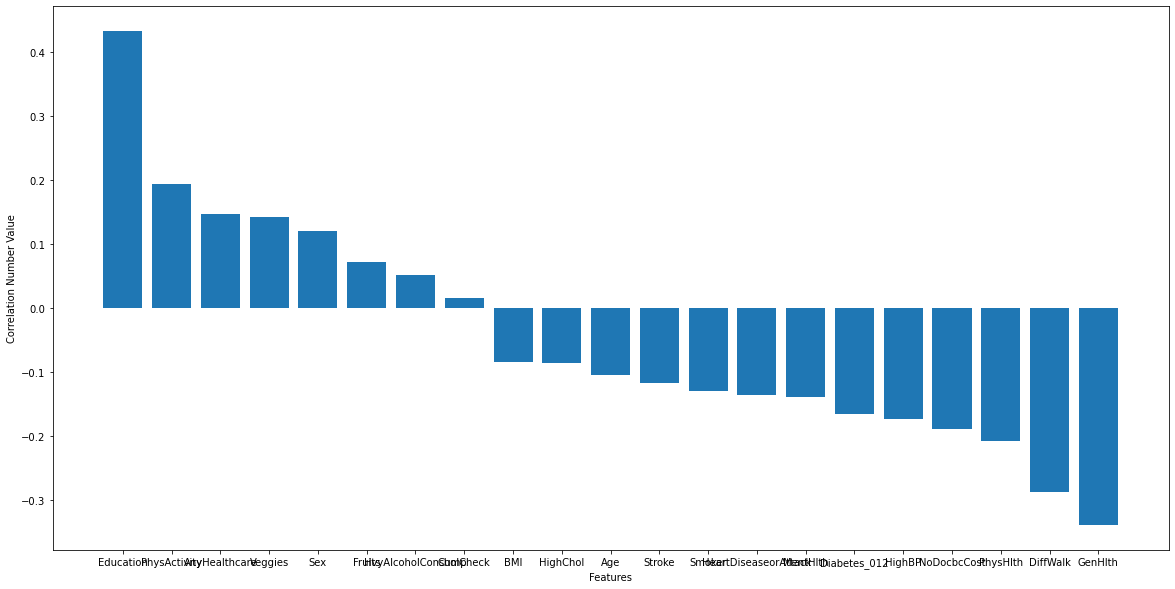

In [20]:
x = []
y = []
for i in range(len(all_correlations)):
    x.append(all_correlations[i][0])
    y.append(all_correlations[i][1])

plt.figure(figsize = (20,10))
plt.bar(x,y)
plt.xlabel("Features")
plt.ylabel("Correlation Number Value")

<AxesSubplot:>

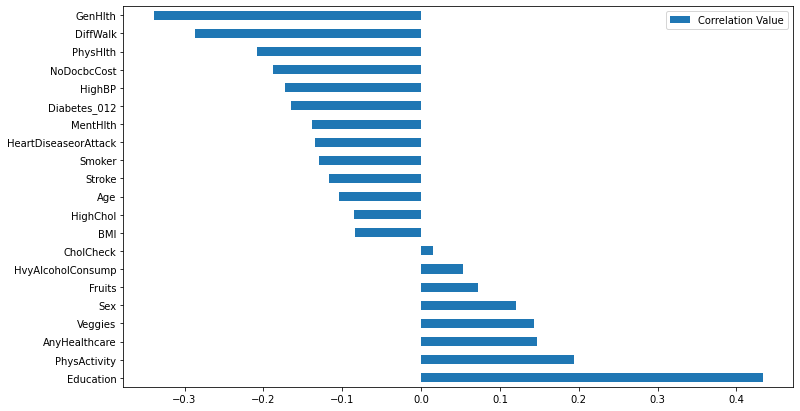

In [21]:
plotdata = pd.DataFrame(
    {"Correlation Value": y}, 
    index=x)
# Plot a bar chart
plotdata.plot(kind="barh", figsize = (12,7))

In [22]:
#Splitting into train then test set
x_train, x_test, y_train, y_test = train_test_split(oversample_copy.drop('Income', axis = 1), oversample_copy['Income'], test_size = 0.15)
#Splitting into train, validation, then test
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.15)

In [23]:
# Now preparing data for OVERSAMPLING using SMOTE which uses K-means clustering
x = x_tr
y = y_tr

In [24]:
y.value_counts()

1.0    76179
2.0    65396
0.0    41708
Name: Income, dtype: int64

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority', k_neighbors = 15)
X, Y = smote.fit_resample(x,y)
Y.value_counts()

1.0    76179
0.0    76179
2.0    65396
Name: Income, dtype: int64

In [26]:
LogReg = LogisticRegression(max_iter=1000).fit(X,Y)
print("Logistic Regression score: %" + str(round((LogReg.score(x_val,y_val)) * 100 , 2)))

Logistic Regression score: %51.88


In [27]:
y_predict = LogReg.predict(x_test)
print (y_test.values)
print (y_predict)

[0. 1. 1. ... 1. 2. 1.]
[0. 0. 1. ... 0. 1. 2.]


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.46      0.65      0.54      8684
         1.0       0.51      0.35      0.42     15809
         2.0       0.58      0.65      0.62     13559

    accuracy                           0.52     38052
   macro avg       0.52      0.55      0.52     38052
weighted avg       0.53      0.52      0.52     38052



In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[5616 2050 1018]
 [5036 5550 5223]
 [1516 3246 8797]]


In [30]:
#[ True Negative False positive] 
#[ False Negative True Positive ]
array = (confusion_matrix(y_test, y_predict))
print ("The amount of True Positives are: " + str(array[1][1]))
print ("The amount of True Negatives are: " + str(array[0][0]))

The amount of True Positives are: 5550
The amount of True Negatives are: 5616


In [31]:
oversample_copy.head(5)

,HighBP,HighChol,BMI,Stroke,PhysActivity,Veggies,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,Diabetes_012
0,1.0,1.0,2.0,0.0,0.0,1.0,5.0,15.0,1.0,1.0,4.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,6.0,0.0,0.0
2,1.0,1.0,1.0,0.0,0.0,0.0,5.0,30.0,1.0,1.0,4.0,2.0,0.0
3,1.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,3.0,1.0,0.0
4,1.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,5.0,0.0,0.0


In [32]:
#                        HighChol    HighBP    DiffWalk    CholCheck     Smoker     HeartDisease
#list_1 = np.array([[        1,         1,         1,           1,          0,            0        ]])
#                      PhysActivity  Fruits    Alcohol      DiffWalk      Sex           age
#list_2 = np.array([[        0,         0,         0,           0,          0,            0        ]])

#oversample_copy = df[['HighBP', 'HighChol', 'BMI', 'Stroke', 'PhysActivity', 'Veggies', 'GenHlth',  'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Diabetes',]]

list_3 = np.array([[      0,         0,        1,       0,           0,           1,         4,           0,         0,        1,        6,          0]])


prediction = LogReg.predict(list_3)[0]
print("Income: " + str(prediction))

Income: 1.0


C:\Users\ccpin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
